In [1]:
import itertools
import nltk
from utilities import *
import re
import random
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
from __future__ import division
from itertools import *
from pylab import *
#from nltk.corpus import brown
import string
import numpy as np
from collections import Counter
import nltk
import pickle
nltk.download('brown')

[nltk_data] Downloading package brown to /home/usergpu/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
# File paths
txt_file_path = "../../final_all_GS_tagged_words_symbols_sentences.txt"
txt_file_path0 = "../../final_all_GS_tagged_words_symbols_sentences_0.txt"
txt_file_path1 = "../../korr_final_symbols_sentences.txt"
txt_file_path2 = "../../ukrlib_final_symbols_sentences.txt" 
txt_file_path10 = "../../korr_final_symbols_sentences_01.txt"
txt_file_path20 = "../../ukrlib_final_symbols_sentences_01.txt"
txt_file_path100 = "../../korr_final_symbols_sentences_00.txt"
txt_file_path200 = "../../ukrlib_final_symbols_sentences_00.txt"


data_path = "data/korr_ukrlib_data.pkl"
test_path = "data/brown_test_data.pkl"
x_pad_data_path = "data/korr_ukrlib_x_pad_data.pkl"
y_pad_data_path = "data/korr_ukrlib_y_pad_data.pkl"

txt_file_path00 = "../../final_all_GS_tagged_words_symbols_sentences_00.txt"
txt_file_path300 = "../../korr_ukrlib_final_symbols_sentences_00.txt"

# Sentence tokens
unknown_token = "_#unknown_"
sentence_start_token = "_#start_"
sentence_end_token = "_#end_"
padding_token = "_#padding_"

#Number of words to hold in vocabulary
vocabulary_size = 300000

In [4]:
with open(txt_file_path300, "rt") as infile:
    tokenized_sentences = [("%s %s %s" % (sentence_start_token, sentence, sentence_end_token)).split() for sentence in infile]

In [30]:
with open(txt_file_path00, "rt") as infile:
    tokenized_sentences_test = [("%s %s %s" % (sentence_start_token, sentence, sentence_end_token)).split() for sentence in infile]

#### Count the word frequencies train

In [5]:
word_frequency = nltk.FreqDist(itertools.chain(*tokenized_sentences)) 

In [6]:
# Get the most common words and build index to word and word to index vectors
vocab = word_frequency.most_common(len(word_frequency.items()))
print("Found %d unique word tokens." % len(word_frequency.items()))

Found 2189477 unique word tokens.


#### Count the word frequencies test

In [31]:
word_frequency_test = nltk.FreqDist(itertools.chain(*tokenized_sentences_test)) 

In [32]:
# Get the most common words and build index to word and word to index vectors
vocab_test = word_frequency_test.most_common(len(word_frequency_test.items()))
print("Found %d unique word tokens." % len(word_frequency_test.items()))

Found 100420 unique word tokens.


In [9]:
vocab_test[:10]

[(',', 58635),
 ('_#start_', 39900),
 ('_#end_', 39900),
 ('.', 36101),
 ('і', 10865),
 ('"', 9703),
 ('на', 9403),
 ('не', 7879),
 ('в', 7855),
 ('у', 7227)]

### Plot Zipf for Korrespondent+Ukr.fiction  (300 000 dict)

In [8]:
tokens_with_count=dict(vocab)
#tokens_with_count[re.compile('_#number_*')] 

In [ ]:
del myDict['_#start_'] 
del myDict['_#end_'] 
del myDict['_#foreign_'] 
del myDict['_#media_'] 
del myDict['_#number_'] 
del myDict['_#float_'] 
del myDict['_#date_']
del myDict['_#date_'] 

In [10]:
vocab[4][1]/sum(list(tokens_with_count.values()))

0.015080337785912081

In [11]:
vocab[5][1]/sum(list(tokens_with_count.values()))

0.014216580791541943

In [12]:
log10(vocab[300000][1])

1.2304489213782739

In [13]:
counts = list(tokens_with_count.values())
counts1 = np.array(tokens_with_count.values())
tokens = list(tokens_with_count.keys())

In [14]:
# A Zipf plot
ranks = arange(1, len(counts)+1)
countsminus=[-c for c in counts]
indices = np.argsort(countsminus)

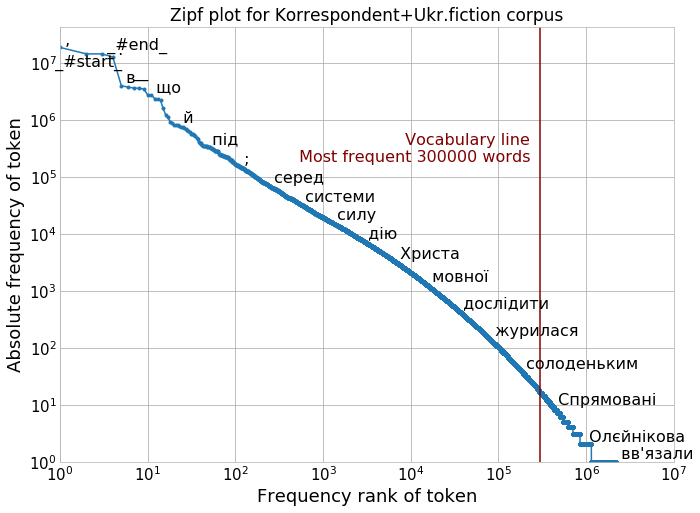

In [48]:
plt.rcParams['figure.figsize'] = [11, 8]
font = {'size': 16}
ax = plt.gca()
matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)

frequencies = [counts[ind] for ind in indices]
loglog(ranks, frequencies, marker=".")
title("Zipf plot for Korrespondent+Ukr.fiction corpus", size=17)
xlabel("Frequency rank of token", size=18)
ylabel("Absolute frequency of token", size=18)
ax.tick_params(axis=u'both', which=u'both',length=0)

grid(True)
ax.set_ylim(ymin=1)
ax.set_xlim(xmin=1, xmax=10000000)
dummy = text(ranks[0], frequencies[0], " " + tokens[indices[0]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[1], frequencies[1]-1000, " " + tokens[indices[1]], 
                 verticalalignment="top",
                 horizontalalignment="center")
dummy = text(ranks[2], frequencies[2], " " + tokens[indices[2]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[4], frequencies[4], " " + tokens[indices[4]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[109], frequencies[109], " " + tokens[indices[109]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[182090], frequencies[182090], " " + tokens[indices[182091]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[2189473], frequencies[2189473], " " + tokens[indices[2189472]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks[417170], frequencies[417170], " " + tokens[indices[417170]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)):
    if n not in [2189476,0,182090,104,417161] :
        #print(n,tokens[indices[n+2]])
        dummy = text(ranks[n+2], frequencies[n+2], " " + tokens[indices[n+2]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
plt.axvline(x=ranks[300000], c='#800000')
dummy = text(ranks[300000], frequencies[100], ' Vocabulary line  \n Most frequent {} words  '.format(300000), 
                 verticalalignment="bottom",
                 horizontalalignment="right" , c='#800000')
ax.spines['top'].set_color('#bababa')
ax.spines['right'].set_color('#bababa')
ax.spines['left'].set_color('#bababa')
ax.spines['bottom'].set_color('#bababa')
show()

### Plot Zipf for test

In [33]:
tokens_with_count_test=dict(vocab_test)

In [34]:
counts_test = list(tokens_with_count_test.values())
counts1_test = np.array(tokens_with_count_test.values())
tokens_test = list(tokens_with_count_test.keys())

In [35]:
# A Zipf plot
ranks_test = arange(1, len(counts_test)+1)
countsminus_test=[-c for c in counts_test]
indices_test = np.argsort(countsminus_test)

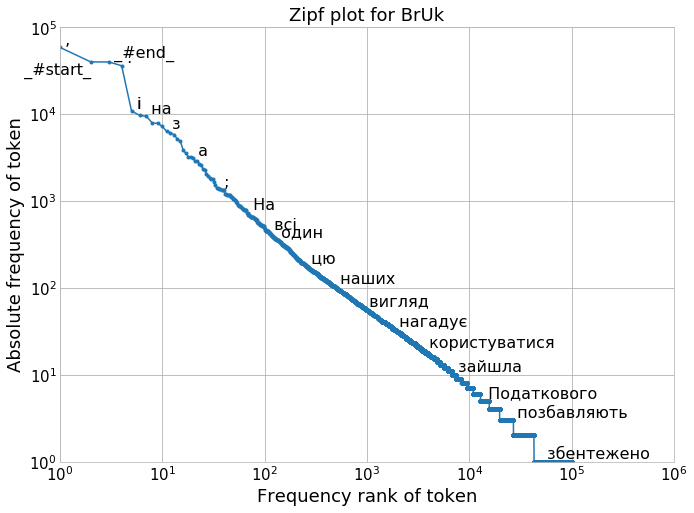

<Figure size 792x576 with 0 Axes>

In [47]:
plt.rcParams['figure.figsize'] = [11, 8]
font = {'size': 16}
ax = plt.gca()
matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)

frequencies_test = [counts_test[ind] for ind in indices_test]
loglog(ranks_test, frequencies_test, marker=".")
title("Zipf plot for BrUk", size=18)
xlabel("Frequency rank of token", size=18)
ylabel("Absolute frequency of token", size=18)
ax.tick_params(axis=u'both', which=u'both',length=0)

grid(True)
ax.set_ylim(ymin=1)
ax.set_xlim(xmin=1, xmax=1000000)
dummy = text(ranks_test[0], frequencies_test[0], " " + tokens_test[indices_test[0]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks_test[1], frequencies_test[1], " " + tokens_test[indices_test[1]], 
                 verticalalignment="top",
                 horizontalalignment="right")
dummy = text(ranks_test[2], frequencies_test[2], " " + tokens_test[indices_test[2]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks_test[4], frequencies_test[4], " " + tokens_test[indices_test[4]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
dummy = text(ranks_test[109], frequencies_test[109], " " + tokens_test[indices_test[109]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
#dummy = text(130130, frequencies_test[-2], tokens_test[indices_test[-3]], 
#                 verticalalignment="top",
#                 horizontalalignment="left")
for n in list(logspace(-0.5, log10(len(counts_test)), 20).astype(int)):
    if n not in [2189476,0,182090,104,100420]:
        #print(n,tokens[indices[n+2]])
        dummy = text(ranks_test[n+2], frequencies_test[n+2], " " + tokens_test[indices_test[n+2]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
ax.spines['top'].set_color('#bababa')
ax.spines['right'].set_color('#bababa')
ax.spines['left'].set_color('#bababa')
ax.spines['bottom'].set_color('#bababa')
show()
plt.savefig('testfr3.png')